In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
minst = input_data.read_data_sets("MNIST_data/",one_hot=True)

W0621 17:29:24.398637 10964 deprecation.py:323] From <ipython-input-3-76b6c1365498>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0621 17:29:24.398637 10964 deprecation.py:323] From C:\Users\HITEN-PC\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0621 17:29:24.402631 10964 deprecation.py:323] From C:\Users\HITEN-PC\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0621 17:29:25.064782 10964 deprecation.py:323] From C:\Users\HITEN-PC\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0621 17:29:25.087778 10964 deprecation.py:323] From C:\Users\HITEN-PC\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0621 17:29:25.224869 10964 deprecation.py:323] From C:\Users\HITEN-PC\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a fu

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(minst)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
minst.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Train dataset
minst.train.num_examples

55000

In [7]:
# Test Dataset
minst.test.num_examples

10000

In [9]:
# validation dataset
minst.validation.num_examples

5000

In [16]:
# 1st image shape
minst.train.images[1].shape

(784,)

In [17]:
# visualize the image

In [18]:
import matplotlib.pyplot as plt

In [53]:
minst.train.labels[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

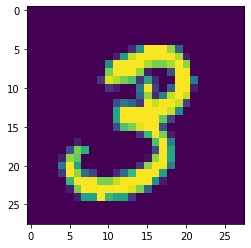

In [22]:
plt.imshow(minst.train.images[1].reshape(28,28))

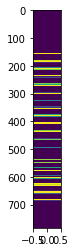

In [29]:
# this frame pass to neural network
plt.imshow(minst.train.images[1].reshape(784,1),aspect=0.01)

# Create Model

In [30]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [31]:
# weight
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [32]:
b = tf.Variable(tf.zeros([10]))

In [33]:
# Create the Graph
y = tf.matmul(x,W) + b 

In [34]:
y_true = tf.placeholder(tf.float32,[None,10])

In [35]:
# Cross Entropy

In [37]:
# predict the error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [38]:
# speed to learn the model = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [39]:
train = optimizer.minimize(cross_entropy)

# create session

In [40]:
init = tf.global_variables_initializer()

In [43]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = minst.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:minst.test.images,y_true:minst.test.labels}))

0.9194
